In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 读取数据集
df = pd.read_csv('US-pumpkins.csv')

# 查看数据集的基本信息
df.shape

(1757, 26)

In [2]:
df.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
# 检查缺失值情况
missing_values = df.isnull().sum()
print("\n各列缺失值数量：")
print(missing_values[missing_values > 0])


各列缺失值数量：
Type               1712
Variety               5
Sub Variety        1461
Grade              1757
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64


In [4]:
# 删除缺失值过多的列
# 定义缺失值比例阈值
missing_threshold = 0.75  # 15%

# 删除缺失值比例超过阈值的列
cols_to_drop = df.columns[df.isnull().mean() > missing_threshold]
df = df.drop(cols_to_drop, axis=1)

# 查看删除后的缺失值情况
missing_values = df.isnull().sum()
print("\n删除后各列缺失值数量：")
print(missing_values[missing_values > 0])

df.shape


删除后各列缺失值数量：
Variety          5
Mostly Low     103
Mostly High    103
Origin           3
Item Size      279
Color          616
dtype: int64


(1757, 12)

In [5]:
# 填充缺失值
df['Variety'] = df['Variety'].fillna('unknown')
df['Origin'] = df['Origin'].fillna('unknown')
df['Item Size'] = df['Item Size'].fillna('unknown')
df['Color'] = df['Color'].fillna('unknown')

In [6]:
# 将价格列转换为数值类型（去除美元符号并转换为浮点数）
price_columns = ['Low Price', 'High Price', 'Mostly Low', 'Mostly High']
for col in price_columns:
    df[col] = df[col].replace({'\$': '', ',': ''}, regex=True).astype(float)

# 将日期列转换为日期类型
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.head()

,City Name,Package,Variety,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Item Size,Color,Repack
0,BALTIMORE,24 inch bins,unknown,2017-04-29,270.0,280.0,270.0,280.0,MARYLAND,lge,unknown,E
1,BALTIMORE,24 inch bins,unknown,2017-05-06,270.0,280.0,270.0,280.0,MARYLAND,lge,unknown,E
2,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,160.0,160.0,160.0,160.0,DELAWARE,med,ORANGE,N
3,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-09-24,160.0,160.0,160.0,160.0,VIRGINIA,med,ORANGE,N
4,BALTIMORE,24 inch bins,HOWDEN TYPE,2016-11-05,90.0,100.0,90.0,100.0,MARYLAND,lge,ORANGE,N


In [8]:
# 识别分类变量列
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("分类变量列：", categorical_cols)

# 对分类变量进行独热编码
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("独热编码后数据集形状：", df_encoded.shape)

# 查看编码后数据示例
print("\n独热编码后数据前5行：")
print(df_encoded.head())

分类变量列： ['City Name', 'Package', 'Variety', 'Origin', 'Item Size', 'Color', 'Repack']
独热编码后数据集形状： (1757, 76)

独热编码后数据前5行：
        Date  Low Price  High Price  Mostly Low  Mostly High  \
0 2017-04-29      270.0       280.0       270.0        280.0   
1 2017-05-06      270.0       280.0       270.0        280.0   
2 2016-09-24      160.0       160.0       160.0        160.0   
3 2016-09-24      160.0       160.0       160.0        160.0   
4 2016-11-05       90.0       100.0        90.0        100.0   

   City Name_BALTIMORE  City Name_BOSTON  City Name_CHICAGO  \
0                 True             False              False   
1                 True             False              False   
2                 True             False              False   
3                 True             False              False   
4                 True             False              False   

   City Name_COLUMBIA  City Name_DALLAS  ...  Item Size_lge  Item Size_med  \
0               False             Fal

与High Price相关性强的特征：
High Price                    1.000000
Mostly High                   0.996174
Mostly Low                    0.989539
Low Price                     0.987353
Package_36 inch bins          0.433154
Package_24 inch bins          0.337257
City Name_BOSTON              0.303481
Package_1/2 bushel cartons   -0.504620
Variety_MINIATURE            -0.544909
Name: High Price, dtype: float64


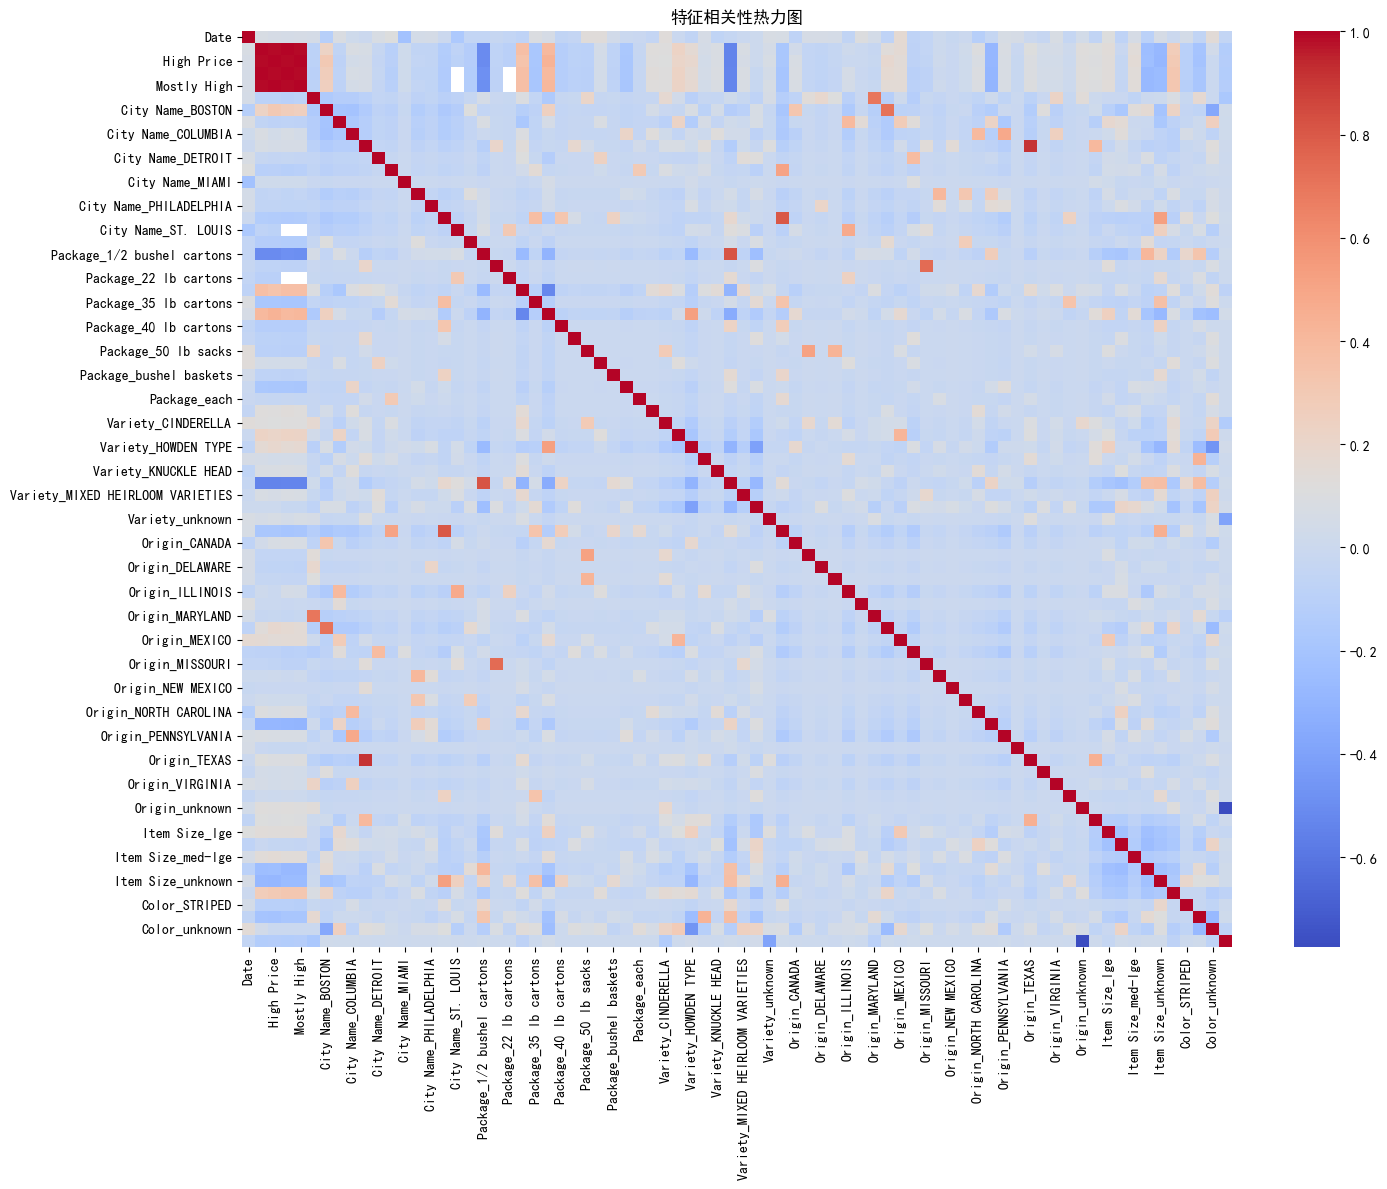

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 计算特征相关性矩阵
correlation = df_encoded.corr()

# 提取与价格相关的特征相关性
price_correlation = correlation['High Price'].sort_values(ascending=False)
print("与High Price相关性强的特征：")
print(price_correlation[abs(price_correlation) > 0.3])  

# 绘制相关性热力图
plt.figure(figsize=(15, 12))
sns.heatmap(correlation, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('特征相关性热力图')
plt.tight_layout()
plt.show()

In [10]:
# 选择与价格相关性强的特征
selected_features = ['Package_36 inch bins', 'Package_24 inch bins', 'City Name_BOSTON', 'Package_1/2 bushel cartons', 'Variety_MINIATURE']

# 准备特征和目标变量
X = df_encoded[selected_features]
y = df_encoded['High Price']

In [11]:
from sklearn.model_selection import train_test_split

# 重新划分训练集和测试集
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

# 定义模型列表
models = {
    '岭回归': Ridge(alpha=1.0),
    'Lasso回归': Lasso(alpha=0.1),
    '随机森林': RandomForestRegressor(n_estimators=100, random_state=42),
    '梯度提升树': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# 定义模型评估函数
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # 训练模型
    model.fit(X_train, y_train)
    
    # 预测
    y_pred = model.predict(X_test)
    
    # 计算评估指标
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # 交叉验证
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()
    
    return {
        '模型': model.__class__.__name__,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'CV_RMSE': cv_rmse
    }

# 评估每个模型
results = []
for name, model in models.items():
    result = evaluate_model(model, X_train_imputed, y_train_imputed, X_test_imputed, y_test_imputed)
    results.append(result)

# 显示模型评估结果
pd.DataFrame(results).sort_values('R²', ascending=False)

,模型,MSE,RMSE,MAE,R²,CV_RMSE
3,GradientBoostingRegressor,2549.236402,50.489963,32.648902,0.701124,53.384193
2,RandomForestRegressor,2650.827177,51.486184,33.206939,0.689213,54.207797
0,Ridge,2966.161479,54.462478,36.078976,0.652243,52.274397
1,Lasso,2974.083408,54.535158,35.968957,0.651314,52.290436


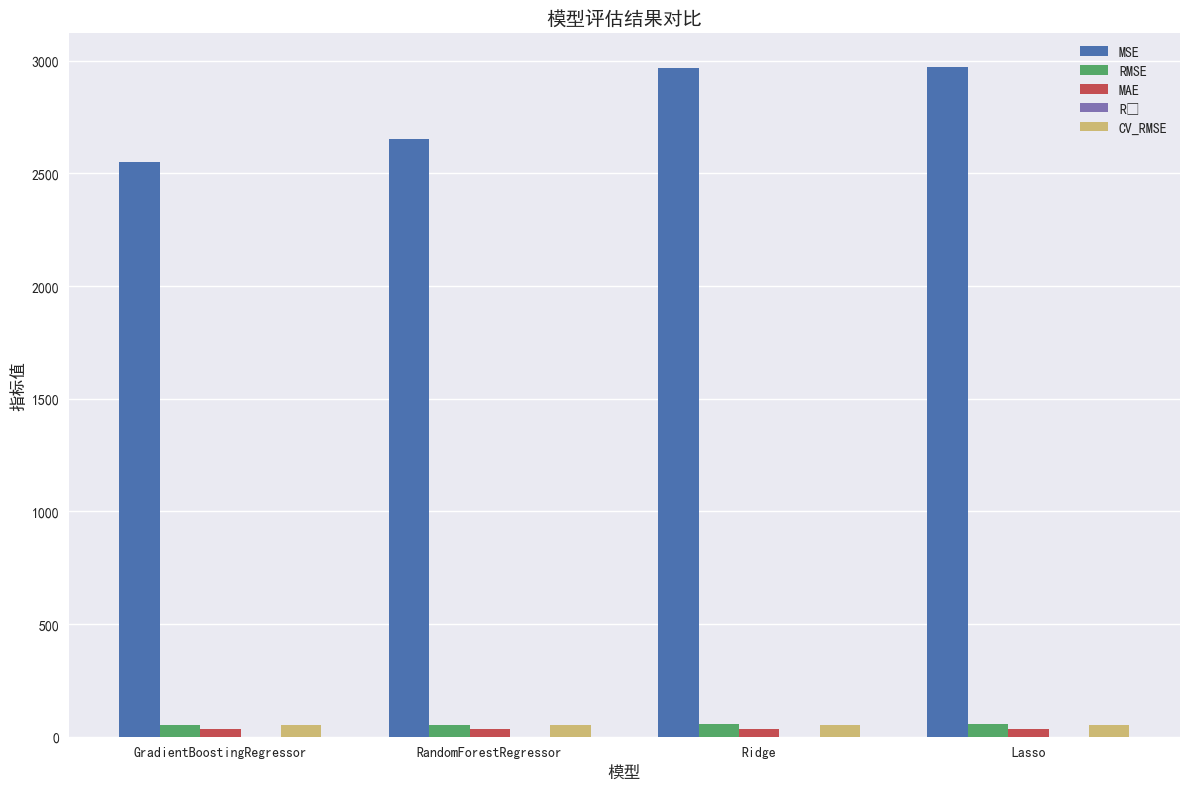

In [13]:
results_df = pd.DataFrame(results).sort_values('R²', ascending=False)

# 设置绘图风格
plt.style.use('seaborn-v0_8')

# 创建图形和坐标轴
fig, ax = plt.subplots(figsize=(12, 8))

# 设置 X 轴位置
x = np.arange(len(results_df['模型']))
width = 0.15  # 柱状图的宽度

# 绘制每个指标的柱状图
ax.bar(x - 2*width, results_df['MSE'], width, label='MSE')
ax.bar(x - width, results_df['RMSE'], width, label='RMSE')
ax.bar(x, results_df['MAE'], width, label='MAE')
ax.bar(x + width, results_df['R²'], width, label='R²')
ax.bar(x + 2*width, results_df['CV_RMSE'], width, label='CV_RMSE')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 添加标题和标签
ax.set_xlabel('模型', fontsize=12, fontweight='bold')
ax.set_ylabel('指标值', fontsize=12, fontweight='bold')
ax.set_title('模型评估结果对比', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(results_df['模型'], fontsize=10)
ax.legend(loc='upper right', fontsize=10)

# 添加网格线
ax.yaxis.grid(True)
ax.xaxis.grid(False)

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

print("\n正在对梯度提升树进行超参数调优...")
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'learning_rate': [0.05, 0.1, 0.15, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

grid_search.fit(X_train_imputed, y_train_imputed)

print("最佳超参数:", grid_search.best_params_)
best_params = grid_search.best_params_
print(f"最佳交叉验证得分: {np.sqrt(-grid_search.best_score_):.4f}")

# 使用最佳超参数的模型
best_tuned_model = grid_search.best_estimator_
best_tuned_model.fit(X_train_imputed, y_train_imputed)

# 评估调优后的模型
y_pred_tuned = best_tuned_model.predict(X_test_imputed)
mse_tuned = mean_squared_error(y_test_imputed, y_pred_tuned)
rmse_tuned = np.sqrt(mse_tuned)
mae_tuned = mean_absolute_error(y_test_imputed, y_pred_tuned)
r2_tuned = r2_score(y_test_imputed, y_pred_tuned)

print(f"\n梯度提升树调优后模型评估:")
print(f"MSE: {mse_tuned:.4f}")
print(f"RMSE: {rmse_tuned:.4f}")
print(f"MAE: {mae_tuned:.4f}")
print(f"R²: {r2_tuned:.4f}")


正在对梯度提升树进行超参数调优...
最佳超参数: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
最佳交叉验证得分: 49.6506

梯度提升树调优后模型评估:
MSE: 2548.1446
RMSE: 50.4792
MAE: 32.4416
R²: 0.7013



梯度提升树特征重要性排序:
                           特征       重要性
4           Variety_MINIATURE  0.394067
1        Package_24 inch bins  0.378624
0        Package_36 inch bins  0.145572
2            City Name_BOSTON  0.064302
3  Package_1/2 bushel cartons  0.017434


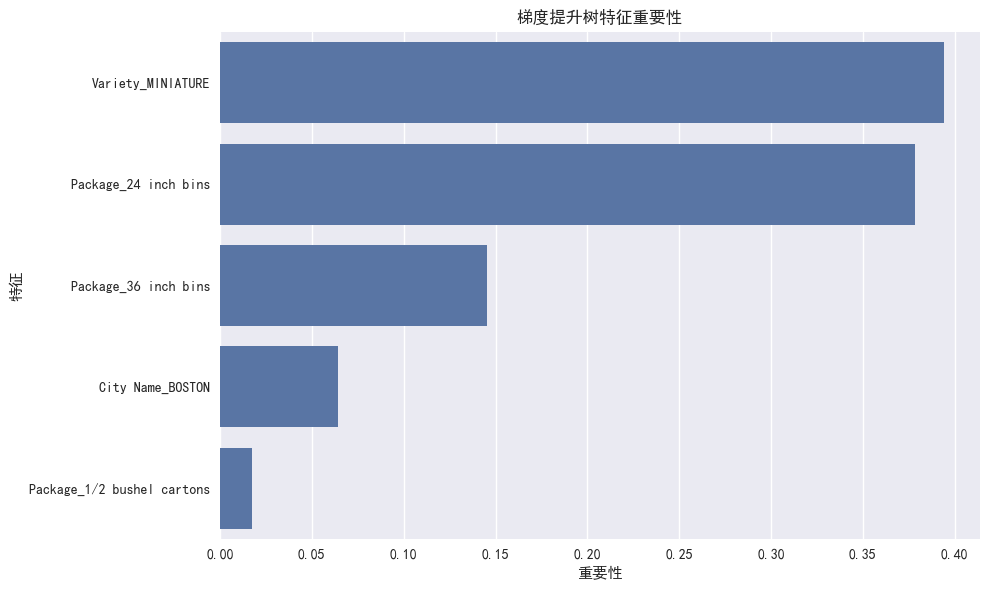

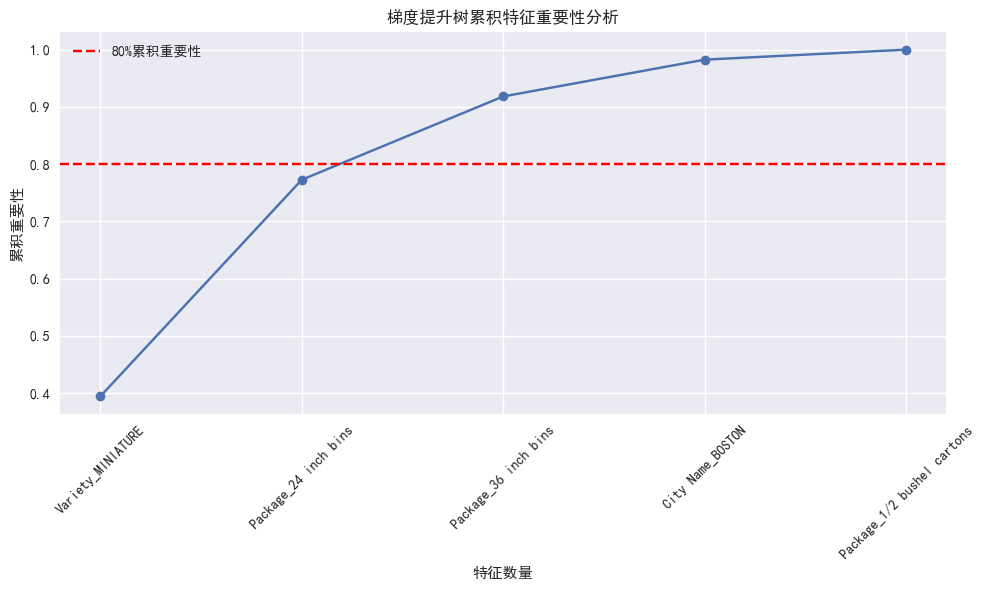

In [15]:
plt.figure(figsize=(10, 6))

# 获取特征重要性
feature_importance = pd.DataFrame({
    '特征': selected_features,
    '重要性': best_tuned_model.feature_importances_
}).sort_values('重要性', ascending=False)

print("\n梯度提升树特征重要性排序:")
print(feature_importance)

# 绘制特征重要性图
sns.barplot(x='重要性', y='特征', data=feature_importance)
plt.title('梯度提升树特征重要性')
plt.tight_layout()
plt.show()

# 绘制累积特征重要性图
feature_importance = feature_importance.sort_values('重要性', ascending=False)
feature_importance['累积重要性'] = feature_importance['重要性'].cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(feature_importance) + 1), feature_importance['累积重要性'], 'o-')
plt.axhline(y=0.8, color='r', linestyle='--', label='80%累积重要性')
plt.xlabel('特征数量')
plt.ylabel('累积重要性')
plt.title('梯度提升树累积特征重要性分析')
plt.xticks(range(1, len(feature_importance) + 1), feature_importance['特征'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

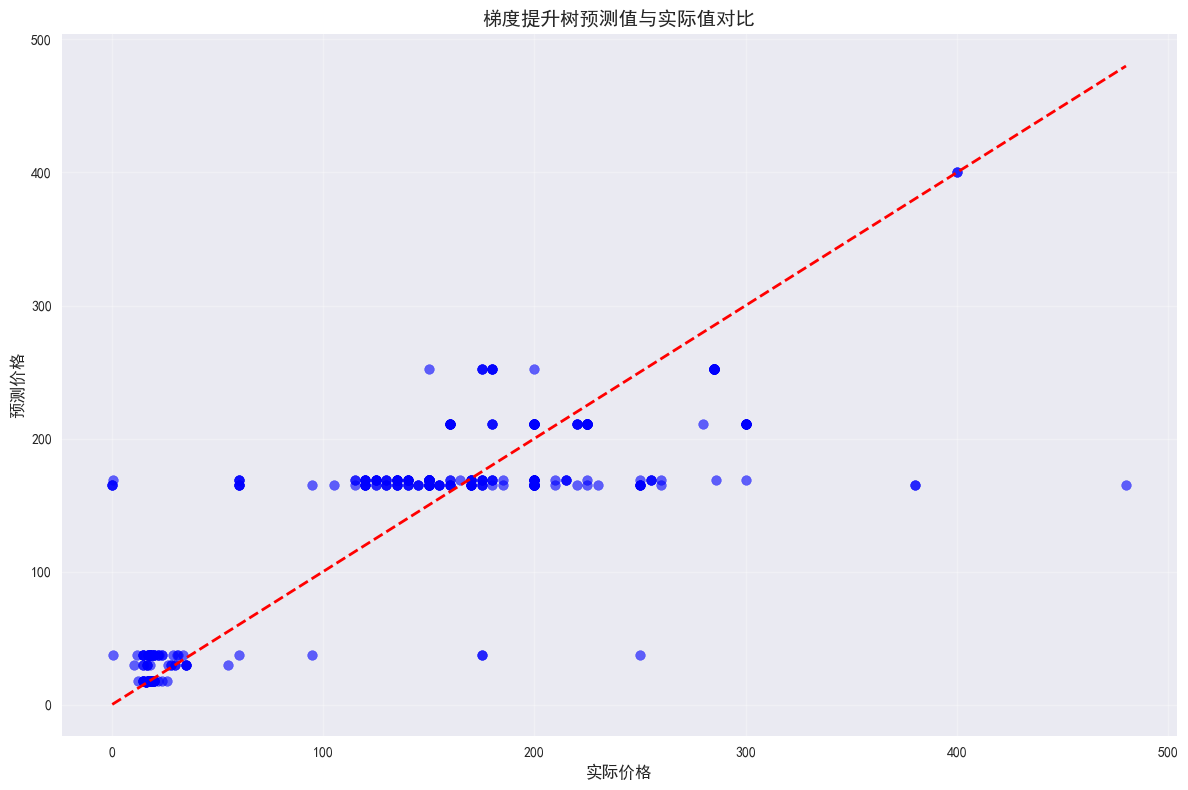

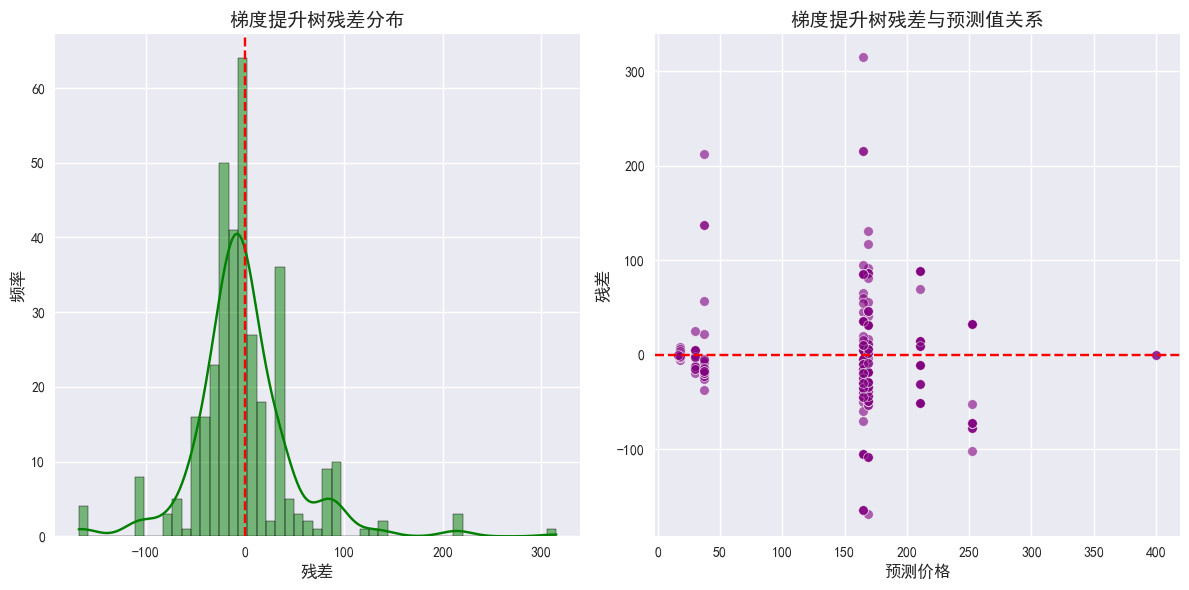

In [16]:
# 绘制预测值与实际值对比图
plt.figure(figsize=(12, 8))
plt.scatter(y_test_imputed, y_pred_tuned, alpha=0.6, color='blue')
plt.plot([y_test_imputed.min(), y_test_imputed.max()], 
         [y_test_imputed.min(), y_test_imputed.max()], 'r--', linewidth=2)
plt.xlabel('实际价格', fontsize=12)
plt.ylabel('预测价格', fontsize=12)
plt.title('梯度提升树预测值与实际值对比', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 绘制残差分布图
residuals = y_test_imputed - y_pred_tuned
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='green')
plt.axvline(x=0, color='r', linestyle='--')
plt.title('梯度提升树残差分布', fontsize=14)
plt.xlabel('残差', fontsize=12)
plt.ylabel('频率', fontsize=12)

# 绘制残差与预测值关系图
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_tuned, y=residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('梯度提升树残差与预测值关系', fontsize=14)
plt.xlabel('预测价格', fontsize=12)
plt.ylabel('残差', fontsize=12)

plt.tight_layout()
plt.show()

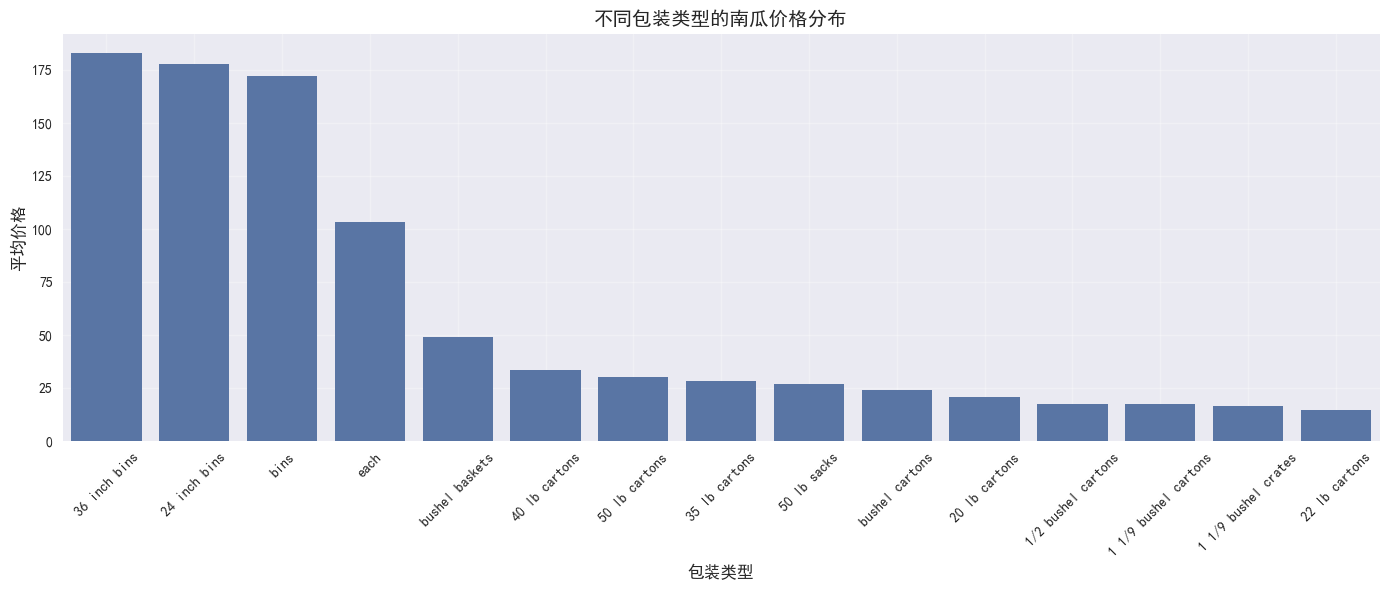

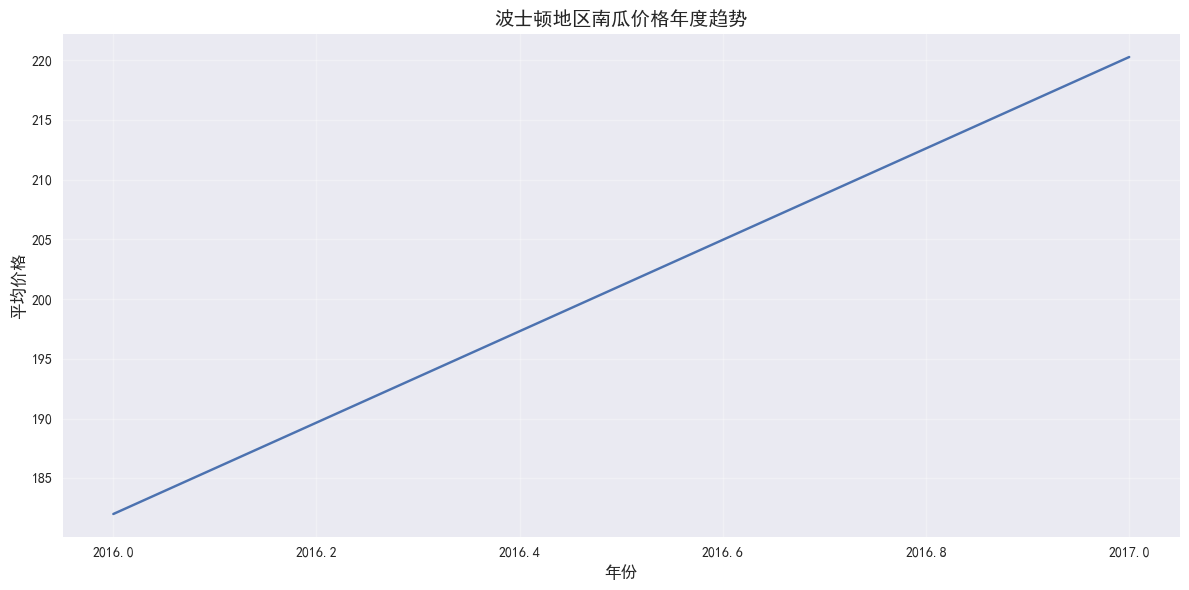

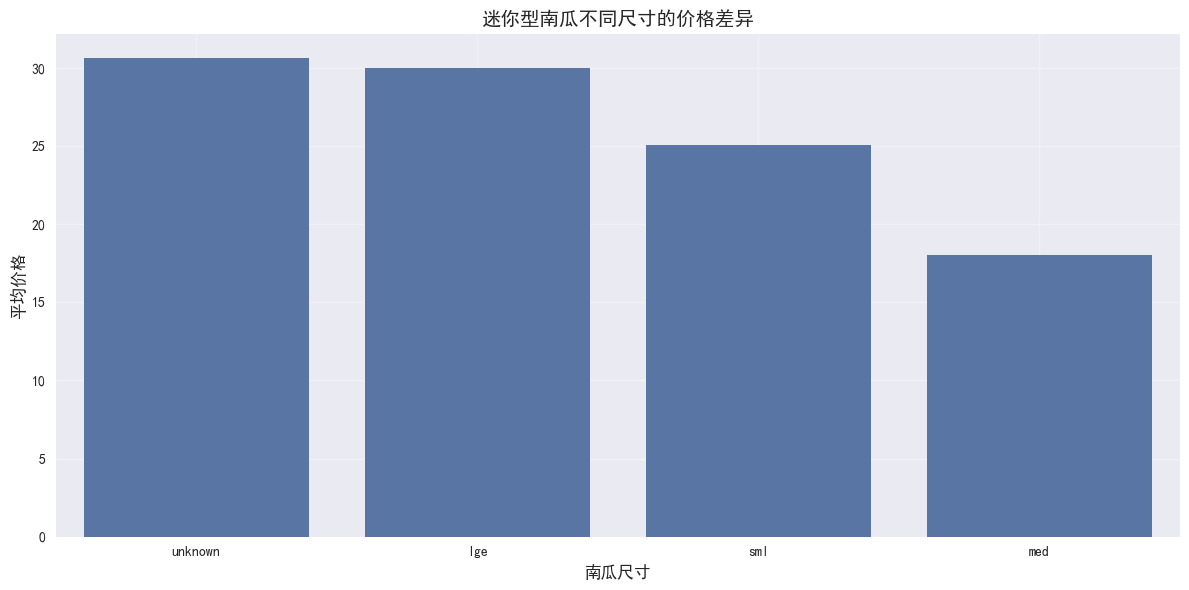

In [17]:
# 分析包装类型对价格的影响
df_package = df[['High Price', 'Package']].copy()
df_package['Package'] = df_package['Package'].fillna('unknown')
package_price = df_package.groupby('Package')['High Price'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='Package', y='High Price', data=package_price.sort_values('High Price', ascending=False))
plt.xlabel('包装类型', fontsize=12)
plt.ylabel('平均价格', fontsize=12)
plt.title('不同包装类型的南瓜价格分布', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 分析波士顿地区价格趋势
df_boston = df[df['City Name'] == 'BOSTON'][['High Price', 'Date']].copy()
df_boston['Year'] = df_boston['Date'].dt.year
boston_yearly_price = df_boston.groupby('Year')['High Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='High Price', data=boston_yearly_price)
plt.xlabel('年份', fontsize=12)
plt.ylabel('平均价格', fontsize=12)
plt.title('波士顿地区南瓜价格年度趋势', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 分析迷你型南瓜尺寸与价格关系
df_miniature = df[df['Variety'] == 'MINIATURE'][['High Price', 'Item Size']].copy()
df_miniature['Item Size'] = df_miniature['Item Size'].fillna('unknown')
miniature_size_price = df_miniature.groupby('Item Size')['High Price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Item Size', y='High Price', data=miniature_size_price.sort_values('High Price', ascending=False))
plt.xlabel('南瓜尺寸', fontsize=12)
plt.ylabel('平均价格', fontsize=12)
plt.title('迷你型南瓜不同尺寸的价格差异', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()